# **Kenny Huang, Danny Hong, Arthur Skok**

In [ ]:
'''
SOURCES USED
  Loading a Dataset from the UCI Machine Learning Repository: https://subscription.packtpub.com/video/data/9781789950922/p1/video1_5/loading-a-dataset-from-the-uci-machine-learning-repository
  Wine UCI: https://archive.ics.uci.edu/ml/datasets/Wine
  Train, validation, test: https://stackoverflow.com/questions/38250710/how-to-split-data-into-3-sets-train-validation-and-test
'''

'\nSOURCES USED\n  Loading a Dataset from the UCI Machine Learning Repository: https://subscription.packtpub.com/video/data/9781789950922/p1/video1_5/loading-a-dataset-from-the-uci-machine-learning-repository\n  Wine UCI: https://archive.ics.uci.edu/ml/datasets/Wine\n  Train, validation, test: https://stackoverflow.com/questions/38250710/how-to-split-data-into-3-sets-train-validation-and-test\n'

# Upload

In [ ]:
# download the forestfires.csv and upload here
# https://archive.ics.uci.edu/ml/datasets/Forest+Fires
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires (2).csv


#   Splitting Training Data

In [ ]:
# -*- coding: utf-8 -*-
"""# **Declaring the variables and formatting the UCI dataset**"""

# Commented out IPython magic to ensure Python compatibility.
# importing a bunch of library crap
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
from numpy.linalg import inv

# We use panda to beautify the data+
data = pd.read_csv(io.StringIO(uploaded['forestfires.csv'].decode('utf-8')))
#data.describe()

"""
ATTRIBUTES:
**temp** - temperature in Celsius degrees: 2.2 to 33.30
**RH** - relative humidity in %: 15.0 to 100
**wind** - wind speed in km/h: 0.40 to 9.40
**rain** - outside rain in mm/m2 : 0.0 to 6.4

**area** - the burned area of the forest (in ha): 0.00 to 1090.84
"""
#Sample Data
#data.head(n=20)
#data.hist()

"""# **Dividing the data: train:80%, validation:10%, test:10%**
## The Function
"""
# this function handles seeding of randomized set creation;
# one should not rely on set splitting that doesn't randomize the sets
def train_validate_test_split(df, train_percent=.8, validate_percent=.1, seed=None):
    np.random.seed(seed)  #seeds the generator
    perm = np.random.permutation(df.index)  #randomly permutate df.index, shuffles the data
    len_dfIndex = len(df.index)
    train_end = int(train_percent * len_dfIndex)
    #the code uses the total number of data entries to split up the shuffled data into three ranges
    #the first range will be the training set, which is established via the inputted training percent
    #and multiplying it by the length of the data set to get the number of entries allocated to the
    #training set and the ending index of the set
    validate_end = int(validate_percent * len_dfIndex)  + train_end + 1
    #validate_end = 52 + train_end
    #the validation set has a range that starts at the end of the training set and uses a similar method
    #as previously described
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

# Setting the train, validate, and test variables; selecting 5 attributes
train, validate, test = train_validate_test_split(data[['temp', 'RH', 'wind','rain','area']])
#print(data[['temp', 'RH', 'wind','rain','area']])

# Linear

In [ ]:
"""# **Linear Regression**
* Use equation 3.6 to find the betas. (https://prnt.sc/tdqghm)
* Report the mean squared error (MSE) on the test dataset.
"""

import numpy as np
from numpy.linalg import inv
def baseline(train, test):
  train_ones = np.ones([len(test['area']), 1])
  test_ones = np.ones([len(test), 1])
  train_input = np.concatenate((test_ones, test.iloc[:, 1:]), axis = 1).astype(float)
  #print ('Training Data Input Size = ', train_input.shape) 
  
  test_input = np.concatenate((test_ones, test.iloc[:, 1:]), axis = 1).astype(float)
  #print ('Test Data Input Size =', train_input.shape) 
  test_output = np.array([test.iloc[:, 0]]).T
  #print ('Test Data Output Size = ', test_output.shape)

  meanArea = train['area'].mean()
  train_output = meanArea * train_ones
  #print (train_output)
  MSE1 = (1/len(test_output)) * (np.sum((test_output - train_output)**2))
  return MSE1

#import numpy as np
#from numpy.linalg import inv
#Defining the Linear Regression Function
def lr(train, test):
  #Declaring column matrices of one for both the train and test data
  train_ones = np.ones([len(train), 1])
  test_ones = np.ones([len(test), 1])

  #Concatenates the one column matrix onto the first column for both the train and test input data 
  #in order to obtain the intercept(constant) term.
  train_input = np.concatenate((train_ones, train.iloc[:, 1:]), axis = 1).astype(float)
  print ('Training Data Input Size = ', train_input.shape) 
  test_input = np.concatenate((test_ones, test.iloc[:, 1:]), axis = 1).astype(float)
  print ('Test Data Input Size = ', test_input.shape) 

  #Declares the output train and test matrices using matrix transpose
  train_output = np.array([train.iloc[:, 0]]).T
  print ('Training Data Output Size = ', train_output.shape)
  test_output = np.array([test.iloc[:, 0]]).T
  print ('Test Data Output Size = ', test_output.shape,'\n')

  #Solves for the betas (weights) by plugging into the unique closed form solution (Equation 3.6)
  beta = np.linalg.inv(train_input.T@train_input)@(train_input.T@train_output)
  
  #Solves for ŷ by using calculated beta values through matrix multiplication (Equation 3.7)
  output_hat = test_input@beta 
 
  #print (first_row(['temp', 'RH', 'wind','rain','area']))
  #Solves for the mean squared error
  MSE = (1/len(test_output)) * (np.sum((test_output - output_hat)**2))
  return beta, output_hat, MSE

## Linear Output

In [ ]:
MSE1 = baseline(train,test)
print("MSE for baseline is", MSE1,'\n')
[beta, output_hat, MSE] = lr(train,test)
print("\nβ:", beta)
print("\nŷ:", output_hat)
print("\nMSE:", MSE)
percent = MSE/MSE1*100
print("Linear regression is",percent,"% better than baseline (prediction based off average of outputs) for this particular selection of data.")


In [ ]:
train

NameError: ignored

In [ ]:
validate
#51

In [ ]:
test
#53

In [ ]:
print(data)

## Ridge

In [ ]:
#Ridge Regression
"""
Use equation 3.44 to find the betas. (https://prnt.sc/tdqhgy)
Select the optimal value of Lambda by cross-validation using the validation dataset
Report the mean squared error on the test dataset, using the best lambda you found on the validation set.
DO NOT USE THE TEST DATASET TO CHOOSE LAMBDA.
"""

#Ridge = sum of square residuals + (lambda * (slope^2))

#A List of lambda values that will be used when performing Ridge Regression and Lasso Regression 
lambd_list = [0.0001, 0.0004, 0.0007, 0.001, 0.004, 0.007, 0.01, 0.04, 0.07, 0.1, 0.4, 0.7, 0.9, 0.99, 0.999]

#Declaring a list that will contain all the calculated Mean Square Error Values for each lambda value
MSE_list = []

#Defining the Normalize Function
def normalize(data):
  norm_data = (data - data.min()) / (data.max() - data.min())
  return norm_data

#Defining the Ridge Regression Function
def rr(train, validate, test):  
  #Applying normalize function to "normalize" the data
  train_input = normalize(np.array(train.iloc[:, 1:]))
  print("Normalized Training Data Input Size: ", train_input.shape)
  train_output = normalize(np.array(train.iloc[:, 0]))
  print("Normalized Training Data Output Size: ", train_output.shape)

  validate_input = normalize(np.array(validate.iloc[:, 1:]))
  print("Normalized Validation Data Input Size: ", validate_input.shape)
  validate_output = normalize(np.array(validate.iloc[:, 0]))
  print("Normalized Validation Data Output Size: ", validate_output.shape)

  test_input = normalize(np.array(test.iloc[:, 1:]))
  print("Normalized Test Data Input Size: ", test_input.shape)
  test_output = normalize(np.array(test.iloc[:, 0]))
  print("Normalized Test Data Output Size: ", test_output.shape)

  #Iterates through the list of lambdas in order to eventually find the smallest mean squared error value
  for lambd in lambd_list:
    #Calculating the ridge regression beta values (weights) for each lambda 
    ridgebeta = (np.linalg.inv((np.identity(len(train_input.T))*lambd) + (train_input.T@train_input)))@(train_input.T)@(train_output)
    output_hat = validate_input@ridgebeta
    #Calculates the mean squared error values and adds them to the mean squared error array list
    MSE = (1/len(validate_output)) * (np.sum((validate_output - output_hat)**2))
    MSE_list.append(MSE)
  
  #Solves for the optimal lambda value by using the smallest mean squared error value found 
  optimal_lambd = lambd_list[MSE_list.index(min(MSE_list))]
  #Retrains the model using the optimal lambda value by calculating the new betas (weights)
  new_ridgebeta = (np.linalg.inv((np.identity(len(train_input.T))*optimal_lambd) + (train_input.T@train_input)))@(train_input.T)@(train_output)
  #Calculates updated ŷ values 
  output_hat = test_input@new_ridgebeta
  print("Ridge β Size: ", ridgebeta.shape)
  print("Optimal λ: ", optimal_lambd)
  print("New Ridge β Size: ", new_ridgebeta.shape)
  print("ŷ Size: ", output_hat.shape)
  #Calculates the final mean squared error value
  test = test_output - output_hat
  MSE_final = (1/len(test_output)) * (np.sum((test_output - output_hat)**2))
  return train_input, train_output, MSE_final, output_hat, optimal_lambd, new_ridgebeta, ridgebeta

## Ridge Output

In [ ]:
train_input, train_output, MSE_final, output_hat, optimal_lambd, new_ridgebeta, ridgebeta = rr(train,test,validate)
print("Final Ridge β:", new_ridgebeta)
print("Final MSE:", MSE_final)

Normalized Training Data Input Size:  (413, 4)
Normalized Training Data Output Size:  (413,)
Normalized Validation Data Input Size:  (52, 4)
Normalized Validation Data Output Size:  (52,)
Normalized Test Data Input Size:  (52, 4)
Normalized Test Data Output Size:  (52,)
Ridge β Size:  (4,)
Optimal λ:  0.999
New Ridge β Size:  (4,)
ŷ Size:  (52,)
Final Ridge β: [4.62229178e+00 4.68599728e-01 7.53841105e-04 9.00698063e-01]
Final MSE: 4.0424204500276275


#  Lasso

In [ ]:
#Lasso Regression
'''
Use one of the built-in packages in sci-kit learn or MATLAB to do a Lasso regression.
Select the optimal value of lambda as in part b) and also display a Lasso plot (there are built in functions for Lasso plot in sci-kit/MATLAB).
Which features did the Lasso select for you to include in your model? Do these features make sense?
'''

#Lasso = sum of square residuals + (lambda * abs(slope))
#Lasso excludes useless vars from the equation, slightly better than Ridge at reducing variance in models with lots of useless vars
#Ridge is better when most variables are useful

from sklearn import linear_model
#A List of lambda values that will be used when performing Lasso Regression 
lambd_list = [0.0001, 0.0004, 0.0007, 0.001, 0.004, 0.007, 0.01, 0.04, 0.07, 0.1, 0.4, 0.7]

#Declaring a list that will contain all the calculated Mean Square Error Values for each lambda value
MSE_list = []

def lasso(train, validate, test):
  #Applying normalize function to "normalize" the data
  train_input = normalize(np.array(train.iloc[:, 1:]))
  train_output = normalize(np.array(train.iloc[:, 0]))

  validate_input = normalize(np.array(validate.iloc[:, 1:]))
  validate_output = normalize(np.array(validate.iloc[:, 0]))

  test_input = normalize(np.array(test.iloc[:, 1:]))
  test_output = normalize(np.array(test.iloc[:, 0]))
  
  #Iterates through the list of lambdas in order to eventually find the smallest mean squared error value
  for lambd in lambd_list:
    #Declares the classifier (clf) for each lambda value, which is an estimator instance that stores the model, by using the lasso scikit-learn function
    lasso_clf = linear_model.Lasso(alpha = lambd)
    #Takes in the training input and training output data and "fits" it as features & labels into the model using the scikit-learn "fit" function
    lasso_clf.fit(train_input, train_output)
    #Takes in validation input data to "predict" ŷ values using the scikit-learn "predict" function
    output_hat = lasso_clf.predict(validate_input)
    #MSE
    MSE = (1/len(validate_output)) * (np.sum((test_output - output_hat)**2))
    #print("MSE: ", MSE)
    MSE_list.append(MSE)

  #Solves for the optimal lambda value by using the smallest mean squared error value found 
  optimal_lambd = lambd_list[MSE_list.index(min(MSE_list))]
  #Retrains the model using the optimal lambda value 
  new_lasso_clf = linear_model.Lasso(alpha = optimal_lambd)
  new_lasso_clf.fit(train_input, train_output)
  output_hat = new_lasso_clf.predict(test_input)
  #Calculates the final mean squared error value
  MSE_final = (1/len(test_output)) * (np.sum((test_output - output_hat)**2))

  lasso_alpha_list, lasso_coefficient_list, _ = linear_model.lasso_path(train_input, train_output, eps = 5e-6)
  figure, axis = plt.subplots(figsize = [16, 10])
  lasso_negative_log_alphas = -np.log10(lasso_alpha_list)

  for lasso_coefficient in lasso_coefficient_list:
    axis.plot(lasso_negative_log_alphas, lasso_coefficient.T)

  axis.axvline( x = -np.log10(optimal_lambd), linestyle = "--")
  plt.xlabel("-Log(α)")
  plt.ylabel("coefficients")
  plt.axis("tight")
  plt.title("Lasso Paths")
  plt.show()
  
  return optimal_lambd, MSE_final, output_hat

## Lasso Output

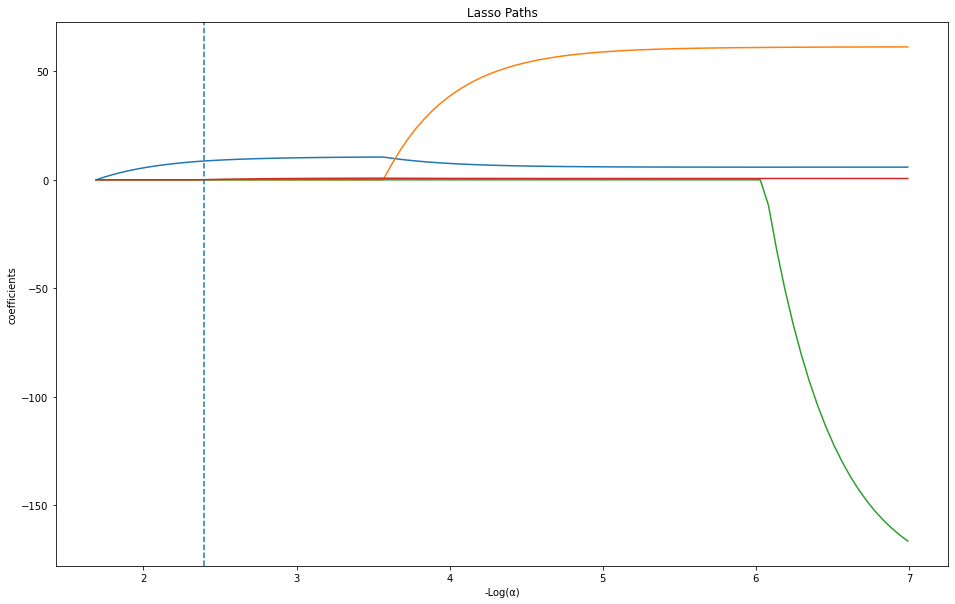

Optimal lambda: 0.004
MSE: 0.04218917716278522
output_hat [0.53616779 0.53616779 0.53616779 0.53616779 0.53616779 0.53616779
 0.53616779 0.53616779 0.53616779 0.53616779 0.53616779 0.53616779
 0.53616779 0.53616779 0.53616779 0.53616779 0.53616779 0.53616779
 0.53616779 0.53616779 0.53616779 0.53616779 0.53616779 0.53616779
 0.53616779 0.53616779 0.53616779 0.53616779 0.53616779 0.53616779
 0.53616779 0.53616779 0.53616779 0.53616779 0.53616779 0.53616779
 0.53616779 0.53616779 0.53616779 0.53616779 0.53616779 0.53616779
 0.53616779 0.53616779 0.53616779 0.53616779 0.53616779 0.53616779
 0.53616779 0.53616779 0.53616779 0.53616779]


In [ ]:
optimal_lambda, MSE_final, output_hat = lasso(train, validate, test)
print("Optimal lambda:", optimal_lambda)
print("MSE:", MSE_final)
print("output_hat", output_hat)

%matplotlib inline
from matplotlib.pylab import rcParams